# Group Assignment #3: A Clean Notebook

## Compilation of Work

We decide to shift to block group data for further analysis as it will help us perform better autocorrelations studies. For this purpose, we downloaded data for two years, 2019 and 2013. There is no 2013 block group level data avaliable for our variables,  hence we shift to 2013, which is still before the projects were competed and hence within the time frame.  
In this note book we will
1. Import 2019 data and narrow it down to relevant variables.
2. Import 2013 data and do a spatial join to obtain geodataframe, and also narrow it down to relevant variables
3. Create percentage for different ethnicity groups for each year.
4. Create a percentage change for various ethnicity groups from 2013 to 2019. 

We only need the pandas and geopandas library for all these tasks. 

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Import 2019 data and narrow it down to relevant variables.

The data is available at census explorer as a geoJSON format, hence saving considerable time. First to check our data.

In [2]:
b2019 = gpd.read_file("acs2019_5yr_B03002_15000US060014094001.geojson")
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."


The Row 1 is total of rows which we need to remove. Let us drop this row.

In [3]:
b2019=b2019.drop([0])
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,263.0,1139.0,255.0,1008.0,248.0,18.0,27.0,...,12.0,37.0,60.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Now to retain only columns we need, we first check which columns are present, and then retain only the ones we need.

In [4]:
list(b2019)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [5]:
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']
block2019=b2019[columns_to_keep]
block2019.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1139.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Perfect! Now we rename all column headers to make them meaningful and also add a suffix to indicate that these are 2019 values.

In [6]:
block2019.columns = ['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'geometry']
block2019.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1139.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [64]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 1 to 1047
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1047 non-null   object  
 1   NAME                                                                  1047 non-null   object  
 2   Total_2019                                                            1047 non-null   float64 
 3   Non Hispanic_2019                                                     1047 non-null   float64 
 4   Non Hispanic White_2019                                               1047 non-null   float64 
 5   Non Hispanic Black_2019                                               1047 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   1047 non-n

In [66]:
block2019.tail()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Percent Total_2019,Percent Non Hispanic_2019,Percent Non Hispanic White_2019,Percent Non Hispanic Black_2019,Percent Non Hispanic American Indian and Alaska Native_2019,Percent Non Hispanic Asian_2019,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Percent Non Hispanic Some other race_2019,Percent Non Hispanic Two or more races_2019,Percent Hispanic_2019
1043,060014517043,"Block Group 3, Alameda, CA",807.0,662.0,479.0,17.0,10.0,47.0,0.0,0.0,...,100.0,82.032218,59.355638,2.106568,1.239157,5.824040,0.00000,0.000000,13.506815,17.967782
1044,060019819001,"Block Group 1, Alameda, CA",58.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,...,100.0,86.206897,86.206897,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,13.793103
1045,060019820001,"Block Group 1, Alameda, CA",63.0,55.0,10.0,23.0,2.0,20.0,0.0,0.0,...,100.0,87.301587,15.873016,36.507937,3.174603,31.746032,0.00000,0.000000,0.000000,12.698413
1046,060019832001,"Block Group 1, Alameda, CA",583.0,536.0,308.0,53.0,9.0,138.0,3.0,5.0,...,100.0,91.938250,52.830189,9.090909,1.543739,23.670669,0.51458,0.857633,3.430532,8.061750
1047,060019900000,"Block Group 0, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
block2019=block2019.drop([1047])

In [68]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1046 non-null   object  
 1   NAME                                                                  1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic_2019                                                     1046 non-null   float64 
 4   Non Hispanic White_2019                                               1046 non-null   float64 
 5   Non Hispanic Black_2019                                               1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   1046 non-n

## Importing and cleaning 2013 data, and spatial join

2013 data unfortunately is not in geojson format. we download the CSV file for census.gov, and the TIGER/Line shapefiles from census bureau. The CSV is cleaned in a manner similar to the 2019 dataset.

In [7]:
b2013 = gpd.read_file("ACSDT5Y2013.B03002_data_with_overlays_2022-02-21T160847.csv")
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Not Hispanic or Latino,Margin of Error!!Total!!Not Hispanic or Latino,Estimate!!Total!!Not Hispanic or Latino!!White...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Black...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Ameri...,Margin of Error!!Total!!Not Hispanic or Latino...,...,Margin of Error!!Total!!Hispanic or Latino!!So...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,id,Geographic Area Name,None
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None


The county total with total of rows is not the first row. But first row is text that needs to be removed too. Let us check if see if it is present in the end. If so, it must be removed. 

In [8]:
b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None


Yes, let us drop row 0 and 1047

In [9]:
b2013=b2013.drop([0,1047])

b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1042,1740,308,1458,276,1379,271,0,12,0,12,...,49,30,51,30,51,0,12,1500000US060014517042,"Block Group 2, Census Tract 4517.04, Alameda C...",None
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None


In [10]:
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,938,208,840,209,594,140,74,74,15,24,...,13,17,27,17,27,0,12,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


Now to retain necessary columns, and rename them with a suffix to indicate the year.

In [11]:
list(b2013)

['B03002_001E',
 'B03002_001M',
 'B03002_002E',
 'B03002_002M',
 'B03002_003E',
 'B03002_003M',
 'B03002_004E',
 'B03002_004M',
 'B03002_005E',
 'B03002_005M',
 'B03002_006E',
 'B03002_006M',
 'B03002_007E',
 'B03002_007M',
 'B03002_008E',
 'B03002_008M',
 'B03002_009E',
 'B03002_009M',
 'B03002_010E',
 'B03002_010M',
 'B03002_011E',
 'B03002_011M',
 'B03002_012E',
 'B03002_012M',
 'B03002_013E',
 'B03002_013M',
 'B03002_014E',
 'B03002_014M',
 'B03002_015E',
 'B03002_015M',
 'B03002_016E',
 'B03002_016M',
 'B03002_017E',
 'B03002_017M',
 'B03002_018E',
 'B03002_018M',
 'B03002_019E',
 'B03002_019M',
 'B03002_020E',
 'B03002_020M',
 'B03002_021E',
 'B03002_021M',
 'GEO_ID',
 'NAME',
 'geometry']

In [12]:
columns_to_keep2= ['B03002_001E',
                   'B03002_002E',
                   'B03002_003E',
                   'B03002_004E',
                   'B03002_005E',
                   'B03002_006E',
                   'B03002_007E',
                   'B03002_008E',
                   'B03002_009E',
                   'B03002_012E',
                   'GEO_ID',
                   'NAME',
                   'geometry']
block2013=b2013[columns_to_keep2]
block2013.columns = [
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'GEOID',
 'NAME',
 'geometry']
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME,geometry
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


If you notice the last column, it gives none for geometry. While this means our data is not a geodataframe, it is a nuisance for when we want to merge with a geodataframe. So let us remove that. 

In [13]:
block2013=block2013[[
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'GEOID',
 'NAME']]

In [14]:
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


In [65]:
block2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Total_2013                                                    1046 non-null   object
 1   Non Hispanic_2013                                             1046 non-null   object
 2   Non Hispanic White_2013                                       1046 non-null   object
 3   Non Hispanic Black_2013                                       1046 non-null   object
 4   Non Hispanic American Indian and Alaska Native_2013           1046 non-null   object
 5   Non Hispanic Asian_2013                                       1046 non-null   object
 6   Non Hispanic Native Hawaiian and Other Pacific Islander_2013  1046 non-null   object
 7   Non Hispanic Some other race_2013                             1046 non-null   

Perfect! 
## To convert the dataframe into a geodata frame

First we load the shape file and retain only geometry columns and the GEOID.

In [15]:
blockshape = gpd.read_file("2013_block/tl_2013_06_bg.shp")

In [16]:
blockshape.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,025,940000,3,060259400003,Block Group 3,G5030,S,12266442,680335,+32.7424027,-114.6675664,"POLYGON ((-114.72653 32.71824, -114.72639 32.7..."
1,06,025,010800,2,060250108002,Block Group 2,G5030,S,59331705,0,+32.7658550,-115.3923893,"POLYGON ((-115.43082 32.73090, -115.43082 32.7..."
2,06,025,010800,1,060250108001,Block Group 1,G5030,S,230656790,0,+32.8363463,-115.3514134,"POLYGON ((-115.45784 32.90895, -115.45773 32.9..."
3,06,025,011100,3,060250111003,Block Group 3,G5030,S,1209336,0,+32.7932442,-115.6903925,"POLYGON ((-115.70134 32.79085, -115.70091 32.7..."
4,06,073,010013,2,060730100132,Block Group 2,G5030,S,404606,0,+32.5564082,-117.0507980,"POLYGON ((-117.05430 32.55542, -117.05430 32.5..."


In [17]:
blockshape.tail()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
23207,06,113,010602,2,061130106022,Block Group 2,G5030,S,349540,0,+38.5483345,-121.7365530,"POLYGON ((-121.73996 38.55141, -121.73974 38.5..."
23208,06,113,010602,3,061130106023,Block Group 3,G5030,S,598201,0,+38.5494135,-121.7306048,"POLYGON ((-121.73524 38.54438, -121.73508 38.5..."
23209,06,113,011400,1,061130114001,Block Group 1,G5030,S,243685259,0,+38.7914978,-121.9434365,"POLYGON ((-122.06145 38.91349, -122.06132 38.9..."
23210,06,113,011400,2,061130114002,Block Group 2,G5030,S,219220061,2549594,+38.8550515,-121.8698636,"POLYGON ((-122.00041 38.92554, -122.00005 38.9..."
23211,06,113,010501,2,061130105012,Block Group 2,G5030,S,2304988,0,+38.5341538,-121.7566773,"POLYGON ((-121.76870 38.53172, -121.76870 38.5..."


Oops, some issue with the GEOID column. Here it starts with 06, while our census data starts with 12. Let us correct it here.

In [18]:
block2013['GEOID'] = block2013['GEOID'].str.replace('1500000US','')
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


In [19]:
block2019['GEOID'] = block2019['GEOID'].str.replace('15000US','')
block2019.sample(5)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
908,060014433012,"Block Group 2, Alameda, CA",3149.0,2837.0,772.0,63.0,0.0,1874.0,0.0,0.0,128.0,312.0,"MULTIPOLYGON (((-121.91815 37.47025, -121.9181..."
594,060014331042,"Block Group 2, Alameda, CA",732.0,431.0,234.0,79.0,0.0,104.0,0.0,0.0,14.0,301.0,"MULTIPOLYGON (((-122.14864 37.71970, -122.1479..."
940,060014502002,"Block Group 2, Alameda, CA",2149.0,1982.0,827.0,20.0,0.0,948.0,0.0,0.0,187.0,167.0,"MULTIPOLYGON (((-121.91737 37.72895, -121.9173..."
807,060014414021,"Block Group 1, Alameda, CA",1734.0,1703.0,332.0,10.0,9.0,1304.0,0.0,0.0,48.0,31.0,"MULTIPOLYGON (((-122.05035 37.58349, -122.0501..."
944,060014504001,"Block Group 1, Alameda, CA",2071.0,1855.0,1255.0,44.0,0.0,486.0,0.0,0.0,70.0,216.0,"MULTIPOLYGON (((-121.94020 37.72348, -121.9395..."


In [20]:
block2019.sample(5)

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
103,060014042003,"Block Group 3, Alameda, CA",1454.0,1367.0,778.0,119.0,0.0,349.0,13.0,14.0,94.0,87.0,"MULTIPOLYGON (((-122.25241 37.83454, -122.2522..."
259,060014083004,"Block Group 4, Alameda, CA",1243.0,687.0,83.0,483.0,0.0,111.0,0.0,0.0,10.0,556.0,"MULTIPOLYGON (((-122.16769 37.76604, -122.1675..."
992,060014507501,"Block Group 1, Alameda, CA",5630.0,5104.0,1376.0,415.0,0.0,3069.0,17.0,0.0,227.0,526.0,"MULTIPOLYGON (((-121.87219 37.70262, -121.8721..."
830,060014416022,"Block Group 2, Alameda, CA",1077.0,1001.0,639.0,0.0,0.0,338.0,0.0,0.0,24.0,76.0,"MULTIPOLYGON (((-122.02033 37.55714, -122.0202..."
153,060014056002,"Block Group 2, Alameda, CA",1045.0,745.0,312.0,207.0,73.0,81.0,0.0,0.0,72.0,300.0,"MULTIPOLYGON (((-122.24047 37.79867, -122.2398..."


Now that the geocodes are all one and will make merging easy, let us clean up the spatial data for the project. 

<AxesSubplot:>

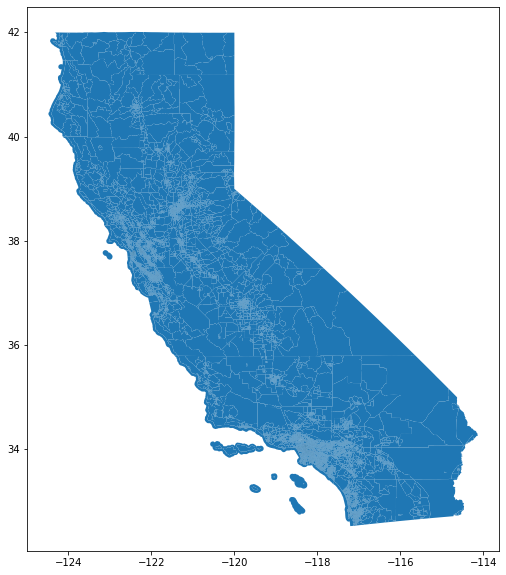

In [21]:
blockshape=blockshape[['GEOID', 'geometry']]
blockshape.plot(figsize=(10,10))

The data is for all of california. 

In [22]:
block2013v = blockshape.merge(block2013, on='GEOID')

To check for the merged data

In [23]:
block2013v.head()

,GEOID,geometry,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,NAME
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",2773,2595,361,51,19,2022,11,0,131,178,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",1371,990,339,21,0,594,0,0,36,381,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",753,480,143,45,9,253,0,0,30,273,"Block Group 1, Census Tract 4060, Alameda Coun..."
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...",931,376,241,93,10,6,0,0,26,555,"Block Group 1, Census Tract 4337, Alameda Coun..."
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...",2296,1800,878,363,0,499,0,0,60,496,"Block Group 2, Census Tract 4364.01, Alameda C..."


To check if the data merged well, let us check its shape and plot it. 

In [24]:
block2013v.shape

(1046, 13)

In [25]:
block2013.shape

(1046, 12)

<AxesSubplot:>

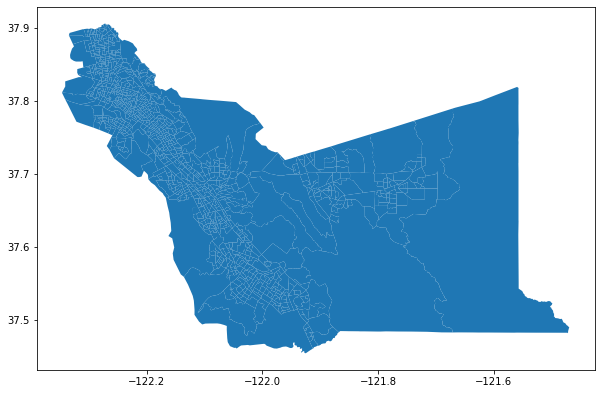

In [26]:
block2013v.plot(figsize=(10,10))

In [69]:
block2013v.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1046 non-null   object  
 1   geometry                                                              1046 non-null   geometry
 2   Total_2013                                                            1046 non-null   float64 
 3   Non Hispanic_2013                                                     1046 non-null   float64 
 4   Non Hispanic White_2013                                               1046 non-null   float64 
 5   Non Hispanic Black_2013                                               1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2013                   1046 non-n

## Creating percentage for different ethnicity groups for each year within a tract. 

We first check datatype of the dataframe, and make any corrections as required. Next we add new columns that calculate the percentages. 

In [27]:
random_tract= block2013v.sample(1)
random_tract

,GEOID,geometry,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,NAME
87,060014202003,"POLYGON ((-122.30059 37.89504, -122.30046 37.8...",1004,897,439,36,0,297,88,0,37,107,"Block Group 3, Census Tract 4202, Alameda Coun..."


In [28]:
type(random_tract.iloc[0]['Non Hispanic_2013'])

str

In [29]:
dtypes = ['Total_2013', 
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']

In [30]:
for i in dtypes:
    block2013v[i]=block2013v[i].astype(float)

In [31]:
random_tract2 = block2013v.sample(1)

In [32]:
type(random_tract2.iloc[0]['Non Hispanic_2013'])

numpy.float64

In [33]:
random_block=block2019.sample(1)

In [34]:
type(random_block.iloc[0]['Non Hispanic_2019'])

numpy.float64

In [35]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 1 to 1047
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID                                                         1047 non-null   object  
 1   NAME                                                          1047 non-null   object  
 2   Total_2019                                                    1047 non-null   float64 
 3   Non Hispanic_2019                                             1047 non-null   float64 
 4   Non Hispanic White_2019                                       1047 non-null   float64 
 5   Non Hispanic Black_2019                                       1047 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019           1047 non-null   float64 
 7   Non Hispanic Asian_2019                             

In [36]:
block2013v.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID                                                         1046 non-null   object  
 1   geometry                                                      1046 non-null   geometry
 2   Total_2013                                                    1046 non-null   float64 
 3   Non Hispanic_2013                                             1046 non-null   float64 
 4   Non Hispanic White_2013                                       1046 non-null   float64 
 5   Non Hispanic Black_2013                                       1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2013           1046 non-null   float64 
 7   Non Hispanic Asian_2013                             

Both the tracts have numbers. Now to add the percentages of different ethnicities: 

In [41]:
def createpercentage(block, year):
    for x in dtypes:
        block[("Percent " + x)] = block[x]/block["Total_"+ year]*100
        print(x, "Completed")

In [42]:
createpercentage(block2013v, "2013")

Total_2013 Completed
Non Hispanic_2013 Completed
Non Hispanic White_2013 Completed
Non Hispanic Black_2013 Completed
Non Hispanic American Indian and Alaska Native_2013 Completed
Non Hispanic Asian_2013 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2013 Completed
Non Hispanic Some other race_2013 Completed
Non Hispanic Two or more races_2013 Completed
Hispanic_2013 Completed


In [43]:
block2013v.head()

,GEOID,geometry,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,...,Percent Total_2013,Percent Non Hispanic_2013,Percent Non Hispanic White_2013,Percent Non Hispanic Black_2013,Percent Non Hispanic American Indian and Alaska Native_2013,Percent Non Hispanic Asian_2013,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Percent Non Hispanic Some other race_2013,Percent Non Hispanic Two or more races_2013,Percent Hispanic_2013
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",2773.0,2595.0,361.0,51.0,19.0,2022.0,11.0,0.0,...,100.0,93.580959,13.018392,1.839163,0.685179,72.917418,0.396682,0.0,4.724125,6.419041
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",1371.0,990.0,339.0,21.0,0.0,594.0,0.0,0.0,...,100.0,72.210066,24.726477,1.531729,0.000000,43.326039,0.000000,0.0,2.625821,27.789934
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",753.0,480.0,143.0,45.0,9.0,253.0,0.0,0.0,...,100.0,63.745020,18.990704,5.976096,1.195219,33.598938,0.000000,0.0,3.984064,36.254980
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...",931.0,376.0,241.0,93.0,10.0,6.0,0.0,0.0,...,100.0,40.386681,25.886144,9.989259,1.074114,0.644468,0.000000,0.0,2.792696,59.613319
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...",2296.0,1800.0,878.0,363.0,0.0,499.0,0.0,0.0,...,100.0,78.397213,38.240418,15.810105,0.000000,21.733449,0.000000,0.0,2.613240,21.602787


In [47]:
col2019=list(block2019)

In [48]:
col2019

['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'geometry']

In [49]:
dtypes19 = ['Total_2019', 
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']
def createpercentage19(block):
    for x in dtypes19:
        block[("Percent " + x)] = block[x]/block['Total_2019']*100
        print(x, "Completed")

In [50]:
createpercentage19(block2019)

Total_2019 Completed
Non Hispanic_2019 Completed
Non Hispanic White_2019 Completed
Non Hispanic Black_2019 Completed
Non Hispanic American Indian and Alaska Native_2019 Completed
Non Hispanic Asian_2019 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2019 Completed
Non Hispanic Some other race_2019 Completed
Non Hispanic Two or more races_2019 Completed
Hispanic_2019 Completed


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [51]:
block2019.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Percent Total_2019,Percent Non Hispanic_2019,Percent Non Hispanic White_2019,Percent Non Hispanic Black_2019,Percent Non Hispanic American Indian and Alaska Native_2019,Percent Non Hispanic Asian_2019,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Percent Non Hispanic Some other race_2019,Percent Non Hispanic Two or more races_2019,Percent Hispanic_2019
1,060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,100.0,96.217949,74.262821,3.429487,0.00000,12.532051,0.0,0.0,5.993590,3.782051
2,060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,...,100.0,90.303030,76.868687,1.313131,0.40404,4.141414,0.0,0.0,7.575758,9.696970
3,060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,...,100.0,92.330383,70.206490,3.834808,0.00000,12.782694,0.0,0.0,5.506391,7.669617
4,060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,...,100.0,93.386243,64.814815,0.000000,0.00000,24.162257,0.0,0.0,4.409171,6.613757
5,060014003002,"Block Group 2, Alameda, CA",1237.0,1139.0,1008.0,18.0,0.0,113.0,0.0,0.0,...,100.0,92.077607,81.487470,1.455133,0.00000,9.135004,0.0,0.0,0.000000,7.922393


In [70]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1046 non-null   object  
 1   NAME                                                                  1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic_2019                                                     1046 non-null   float64 
 4   Non Hispanic White_2019                                               1046 non-null   float64 
 5   Non Hispanic Black_2019                                               1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   1046 non-n

In [71]:
block2013v.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1046 non-null   object  
 1   geometry                                                              1046 non-null   geometry
 2   Total_2013                                                            1046 non-null   float64 
 3   Non Hispanic_2013                                                     1046 non-null   float64 
 4   Non Hispanic White_2013                                               1046 non-null   float64 
 5   Non Hispanic Black_2013                                               1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2013                   1046 non-n

## % change from 2013 to 2019

We first merge the two oriblockall=gpd.sjoin(block2019, block2013v)ginal data frames to be able to do it. Runing the code 

In [56]:
block2013v=block2013v.to_crs(epsg=4326)
block2019=block2019.to_crs(epsg=4326)

In [57]:
blockall=gpd.sjoin(block2019, block2013v)

In [58]:
blockall.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7433 entries, 1 to 1043
Data columns (total 46 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

In [59]:
ball=blockall

In [60]:
for i in list(ball.columns):
    if "2019" in i:
        if "Percent" in i:
            print(i)
        else:
            ball[i.split("_")[0]+"_change"]= (((ball[i]-ball[i.split("_")[0]+"_2013"])/ball[i.split("_")[0]+"_2013"])*100)
       

Percent Total_2019
Percent Non Hispanic_2019
Percent Non Hispanic White_2019
Percent Non Hispanic Black_2019
Percent Non Hispanic American Indian and Alaska Native_2019
Percent Non Hispanic Asian_2019
Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019
Percent Non Hispanic Some other race_2019
Percent Non Hispanic Two or more races_2019
Percent Hispanic_2019


In [61]:
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7433 entries, 1 to 1043
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

In [62]:
ball.head()

,GEOID_left,NAME_left,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Total_change,Non Hispanic_change,Non Hispanic White_change,Non Hispanic Black_change,Non Hispanic American Indian and Alaska Native_change,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change
1,060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,166.894782,172.909091,207.702523,81.355932,NaN,62.240664,NaN,NaN,297.872340,71.014493
2,060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,...,-15.312233,-18.727273,1.062417,-77.966102,inf,-82.987552,NaN,NaN,59.574468,39.130435
3,060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,...,-13.002566,-14.636364,-5.179283,-33.898305,NaN,-46.058091,NaN,NaN,19.148936,13.043478
4,060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,...,-2.994012,-3.727273,-2.390438,-100.000000,NaN,13.692946,NaN,NaN,6.382979,8.695652
101,060014042001,"Block Group 1, Alameda, CA",944.0,917.0,685.0,35.0,3.0,102.0,20.0,23.0,...,-19.247220,-16.636364,-9.030544,-40.677966,inf,-57.676349,inf,inf,4.255319,-60.869565


In [63]:
ball.to_file("blockgroupethnicity2.geojson", driver='GeoJSON')